In [3]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import os

## Data Preparation

In [45]:
cols = [0, 1, 2, 3, 4, 5, 'cat']

df = pd.DataFrame(columns=cols)
filedir = './Inertial/'

for file in os.listdir(filedir):
    
    if not file.startswith("."):
        # import matlab file into df with label
        data = loadmat(filedir + file)
        df1 = pd.DataFrame(data['d_iner'])

        category = file.split('_')[0]
        subcat = str(file.split('_')[0] + '_' + file.split('_')[1] + '_' + file.split('_')[2])
        df1['cat'] = category

        # append to original df
        df = df.append(df1)

        print('appended {}!'.format(subcat))

appended a10_s1_t1!
appended a10_s1_t2!
appended a10_s1_t3!
appended a10_s1_t4!
appended a10_s2_t1!
appended a10_s2_t2!
appended a10_s2_t3!
appended a10_s2_t4!
appended a10_s3_t1!
appended a10_s3_t2!
appended a10_s3_t3!
appended a10_s3_t4!
appended a10_s4_t1!
appended a10_s4_t2!
appended a10_s4_t3!
appended a10_s4_t4!
appended a10_s5_t1!
appended a10_s5_t2!
appended a10_s5_t3!
appended a10_s5_t4!
appended a10_s6_t1!
appended a10_s6_t2!
appended a10_s6_t3!
appended a10_s6_t4!
appended a10_s7_t1!
appended a10_s7_t2!
appended a10_s7_t3!
appended a10_s7_t4!
appended a10_s8_t1!
appended a10_s8_t2!
appended a10_s8_t3!
appended a10_s8_t4!
appended a11_s1_t1!
appended a11_s1_t2!
appended a11_s1_t3!
appended a11_s1_t4!
appended a11_s2_t1!
appended a11_s2_t2!
appended a11_s2_t3!
appended a11_s2_t4!
appended a11_s3_t1!
appended a11_s3_t2!
appended a11_s3_t3!
appended a11_s3_t4!
appended a11_s4_t1!
appended a11_s4_t2!
appended a11_s4_t3!
appended a11_s4_t4!
appended a11_s5_t1!
appended a11_s5_t2!


appended a22_s3_t1!
appended a22_s3_t2!
appended a22_s3_t3!
appended a22_s3_t4!
appended a22_s4_t1!
appended a22_s4_t2!
appended a22_s4_t3!
appended a22_s4_t4!
appended a22_s5_t1!
appended a22_s5_t2!
appended a22_s5_t3!
appended a22_s5_t4!
appended a22_s6_t1!
appended a22_s6_t2!
appended a22_s6_t3!
appended a22_s6_t4!
appended a22_s7_t1!
appended a22_s7_t2!
appended a22_s7_t3!
appended a22_s7_t4!
appended a22_s8_t1!
appended a22_s8_t2!
appended a22_s8_t3!
appended a22_s8_t4!
appended a23_s1_t1!
appended a23_s1_t2!
appended a23_s1_t3!
appended a23_s1_t4!
appended a23_s2_t1!
appended a23_s2_t2!
appended a23_s2_t3!
appended a23_s2_t4!
appended a23_s3_t1!
appended a23_s3_t2!
appended a23_s3_t3!
appended a23_s3_t4!
appended a23_s4_t1!
appended a23_s4_t2!
appended a23_s4_t3!
appended a23_s4_t4!
appended a23_s5_t1!
appended a23_s5_t2!
appended a23_s5_t3!
appended a23_s5_t4!
appended a23_s6_t1!
appended a23_s6_t2!
appended a23_s6_t3!
appended a23_s7_t1!
appended a23_s7_t2!
appended a23_s7_t3!


appended a9_s8_t1!
appended a9_s8_t2!
appended a9_s8_t3!
appended a9_s8_t4!


In [47]:
# 3 classes only
actions = ['a1', 'a2', 'a3']

# subsetting df
df = df[df['cat'].isin(actions)]

In [48]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 0:6]
Y = df.cat

# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=123)

## SVM

In [49]:
# imports
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### Model

In [50]:
import pickle

fname = 'clf_iner_svc.pkl'

# pickling classifier
#with open(fname, 'wb') as handle:
#    pickle.dump(clf_svc, handle)

# loading pickle
with open('clf_iner_svc.pkl', 'rb') as handle:
    clf_svc = pickle.load(handle)

# svc training
# clf_svc = SVC(C=best_cost, gamma=best_gam)
clf_svc.fit(X_train, Y_train)

# svc prediction
Y_pred_svc = clf_svc.predict(X_test)

### Results

In [51]:
# class report, cm and accuracy
print(classification_report(Y_test, Y_pred_svc), end='\n\n')
print(confusion_matrix(Y_test, Y_pred_svc), end='\n\n')
print('acc: {0:.3f}%'.format(accuracy_score(Y_test, Y_pred_svc)*100))

             precision    recall  f1-score   support

         a1       0.57      0.72      0.63      1554
         a2       0.67      0.65      0.66      1461
         a3       0.70      0.55      0.62      1702

avg / total       0.65      0.64      0.64      4717


[[1121  199  234]
 [ 354  947  160]
 [ 503  262  937]]

acc: 63.706%


## Keras

In [52]:
# imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.
/Users/ggu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Data Preparation

In [53]:
# encode class values as integers
# train
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y_train = encoder.transform(Y_train)

# test
encoder.fit(Y_test)
encoded_Y_test = encoder.transform(Y_test)


# convert integers to dummy variables, ie. one-hot encoding
# train
dummy_Y_train = np_utils.to_categorical(encoded_Y_train)

# test
dummy_Y_test = np_utils.to_categorical(encoded_Y_test)

# convert X to np array
X_train_np = np.reshape(X_train.values, (11004,6))
X_test_np = np.reshape(X_test.values, (4717,6))

### Model

In [54]:
seed(123)

# building the model
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])

# fit model
model.fit(X_train_np, dummy_Y_train, epochs=100, batch_size=10, shuffle=False)

Epoch 1/100
11004/11004 [==============================] - 2s 163us/step - loss: 1.3528 - acc: 0.4221
Epoch 2/100
11004/11004 [==============================] - 2s 140us/step - loss: 0.9826 - acc: 0.4731
Epoch 3/100
11004/11004 [==============================] - 1s 132us/step - loss: 0.9448 - acc: 0.5031
Epoch 4/100
11004/11004 [==============================] - 2s 136us/step - loss: 0.9343 - acc: 0.5088
Epoch 5/100
11004/11004 [==============================] - 1s 135us/step - loss: 0.9288 - acc: 0.5115
Epoch 6/100
11004/11004 [==============================] - 2s 142us/step - loss: 0.9212 - acc: 0.5184
Epoch 7/100
11004/11004 [==============================] - 1s 135us/step - loss: 0.9174 - acc: 0.5133
Epoch 8/100
11004/11004 [==============================] - 2s 174us/step - loss: 0.9112 - acc: 0.5235
Epoch 9/100
11004/11004 [==============================] - 2s 137us/step - loss: 0.8907 - acc: 0.5370
Epoch 10/100
11004/11004 [==============================] - 1s 133us/step - loss: 

In [55]:
# predict
dummy_Y_pred = model.predict(X_test_np)

Y_test_class = np.argmax(dummy_Y_test, axis=1)
Y_pred_class = np.argmax(dummy_Y_pred, axis=1)

### Results

In [56]:
# evaluate model
scores = model.evaluate(X_test_np, dummy_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(classification_report(Y_test_class, Y_pred_class), end='\n\n')
print(confusion_matrix(Y_test_class, Y_pred_class))

4717/4717 [==============================] - 0s 24us/step

acc: 63.98%
             precision    recall  f1-score   support

          0       0.56      0.76      0.65      1554
          1       0.73      0.57      0.64      1461
          2       0.68      0.60      0.64      1702

avg / total       0.66      0.64      0.64      4717


[[1176  176  202]
 [ 365  828  268]
 [ 550  138 1014]]


## Hidden Markov Model

In [4]:
from collections import defaultdict
import warnings
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def load_inertial_data():
    dir_path = "Inertial"
    files = os.listdir(dir_path)
    all_data = [] 
    for ii, file in enumerate(files, 1):
        #print(ii, file)
        if file.endswith(".mat"):
            mat_contents = loadmat(dir_path+'/'+file)
            d_skel=mat_contents["d_iner"]
            action = file.split("_")[0]
            all_data.append((d_skel,action))
    print(len(all_data))
    return all_data

In [6]:
def split_data(all_data, all_actions,split_at):
    ddct = defaultdict(list)
    training_data=[]
    testing_data=[]
    for X,y in all_data:
        for action in all_actions:
            if(action == y):
                ddct[action].append(1)
                if len(ddct[action]) < split_at+1:
                    training_data.append((X,y))
                else:
                    testing_data.append((X,y))
    return training_data, testing_data

In [7]:
all_actions=["a"+str(num) for num in range(1,28)]
print(all_actions)

split_at = 26 #as each data contains 32 records so 26 for training and 6 for test

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27']


In [8]:
all_data_iner = load_inertial_data()
training_data_iner, testing_data_iner = split_data(all_data_iner,all_actions,26)

861


In [9]:
print("training.." , len(training_data_iner))
print("testing.." , len(testing_data_iner))

training.. 702
testing.. 159


In [10]:
def fetch_training_data_by_action(records,action):
    action_pairs=[]
    for X,y in records:
        if y == action:
            action_pairs.append((X,y))
    return action_pairs

In [11]:
def train_an_action(action, num_hidden_states, features,lengths):
    
    warnings.filterwarnings("ignore", category=DeprecationWarning)  
    model = GaussianHMM(n_components=num_hidden_states, n_iter=1000,random_state=123,params="ct").fit(features,lengths)
    logL = model.score(features,lengths)
    return model, logL

In [12]:
def get_hmm_formatted_features_inertial(records,action):
    x_contatinated = np.zeros((1,6))
    lengths=[]
    
    actions = fetch_training_data_by_action(records,action)
    action_features,_ = zip(*actions)
    print(len(action_features))
    print(action_features[0].shape)
    
    
    for subject_action in list(action_features):
        lengths.append(subject_action.shape[0])
        x_contatinated = np.append(x_contatinated,subject_action,axis=0)
#         x_contatinated.append(subject_action)
#         for i in range(subject_action.shape[1]):
#             x_contatinated.append(subject_action) #subject_action[:,:,i].reshape(-1,))
    #len(x_contatinated)
    print(x_contatinated[0])
    print(x_contatinated[1])
    x_contatinated = np.delete(x_contatinated, 0, axis=0)
    print(np.array(x_contatinated).shape)
    print(x_contatinated[0])
    print(x_contatinated[1])
    print(lengths)
    return np.array(x_contatinated),lengths

In [13]:
iner_X,iner_lengths = get_hmm_formatted_features_inertial(training_data_iner,'a1')
iner_model, iner_logL = train_an_action('a1', 3, iner_X ,iner_lengths)

26
(160, 6)
[ 0.  0.  0.  0.  0.  0.]
[-0.959473 -0.177734 -0.192871  5.221374  1.526718  0.152672]
(4150, 6)
[-0.959473 -0.177734 -0.192871  5.221374  1.526718  0.152672]
[-0.961914 -0.15332  -0.159912  6.778626  1.954198  0.244275]
[160, 154, 165, 158, 142, 156, 143, 157, 146, 127, 125, 150, 145, 143, 142, 160, 186, 170, 190, 180, 187, 180, 183, 189, 149, 163]


In [14]:
print("Number of states trained in model for {} is {}".format('a1', iner_model.n_components))
print("logL = {}".format(iner_logL))

Number of states trained in model for a1 is 3
logL = -74799.60789966404


In [15]:
def show_iner_model_stats(word, model):
    print("Number of states trained in model for {} is {}".format(word, iner_model.n_components))    
    variance=np.array([np.diag(iner_model.covars_[i]) for i in range(iner_model.n_components)])    
    for i in range(iner_model.n_components):  # for each hidden state
        print("hidden state #{}".format(i))
        print("mean = ", iner_model.means_[i])
        print("variance = ", variance[i])
        print()
    
show_iner_model_stats('a1', iner_model)

Number of states trained in model for a1 is 3
hidden state #0
mean =  [ -0.66176301  -0.12486223  -0.2144198   12.32412024  -3.64200058
 -17.51877356]
variance =  [  2.18639484e-01   1.56473128e-01   1.54231270e-01   1.02009770e+03
   2.96687517e+02   5.63874099e+02]

hidden state #1
mean =  [  -0.58335413   -0.4446879    -0.3819892   -68.34798571   70.56537969
 -186.95872567]
variance =  [  2.39588621e-01   5.24661217e-01   1.45156780e-01   6.81527344e+03
   1.29299757e+04   7.21827994e+03]

hidden state #2
mean =  [  -0.85317914   -0.44072517   -0.26772264  159.4666085   -67.62036205
  126.2903555 ]
variance =  [  2.03241365e-01   1.92027037e-01   1.39350466e-01   6.03629137e+03
   7.03057508e+03   9.11164864e+03]



In [16]:
all_sequences={}
all_lengths={}
actions= ['a1','a2','a3']

for action in actions:
    X,lengths = get_hmm_formatted_features_inertial(training_data_iner,action)
    all_sequences[action] = X
    all_lengths[action]=lengths

26
(160, 6)
[ 0.  0.  0.  0.  0.  0.]
[-0.959473 -0.177734 -0.192871  5.221374  1.526718  0.152672]
(4150, 6)
[-0.959473 -0.177734 -0.192871  5.221374  1.526718  0.152672]
[-0.961914 -0.15332  -0.159912  6.778626  1.954198  0.244275]
[160, 154, 165, 158, 142, 156, 143, 157, 146, 127, 125, 150, 145, 143, 142, 160, 186, 170, 190, 180, 187, 180, 183, 189, 149, 163]
26
(166, 6)
[ 0.  0.  0.  0.  0.  0.]
[ -0.931152  -0.307861  -0.08252   23.603053  11.022901   5.618321]
(4122, 6)
[ -0.931152  -0.307861  -0.08252   23.603053  11.022901   5.618321]
[ -0.92334   -0.361328  -0.074707  25.312977   8.732824   6.167939]
[166, 146, 139, 146, 165, 131, 152, 159, 154, 140, 164, 139, 128, 147, 144, 168, 157, 178, 182, 186, 187, 190, 195, 194, 125, 140]
26
(184, 6)
[ 0.  0.  0.  0.  0.  0.]
[ -0.995605  -0.418213  -0.188477  13.435115  15.267176  -7.236641]
(4637, 6)
[ -0.995605  -0.418213  -0.188477  13.435115  15.267176  -7.236641]
[ -1.016113  -0.396729  -0.229492  18.167939  26.503817 -12.305344]


In [17]:
import time
import timeit
# autoreload for automatically reloading changes made in model_selectors
%load_ext autoreload
%autoreload 2

In [18]:
def train_all_actions(actions):
    models={}
    for action in actions:
        print("training for ",action)
        X = all_sequences[action]
        print(X.shape)
        lengths = all_lengths[action]
        model, logL = train_an_action(action, 20, X ,lengths)
        models[action]=model
        #time.sleep(2)
    return models

In [19]:
models = train_all_actions(actions)

training for  a1
(4150, 6)


/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


training for  a2
(4122, 6)


/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


training for  a3
(4637, 6)


/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


In [20]:
# testing on known actions
def recognize_actions(features):
    probabilities = []
    guesses = []


    print('Started recognizing ...')
    
    bestLL = float("-inf")
    bestAction = None
    probs = {}
    for action, model in models.items():
        try:
            ll = model.score(features)
            if ll > bestLL:
                    bestLL = ll
                    bestAction = action
                    probs[action] = ll
        except:
            print(" ! ",end=" ")
            pass
    
    guesses.append(bestAction)
    probabilities.append(probs)
    return guesses,probabilities

In [23]:
test_AsX,test_A3sL = get_hmm_formatted_features_inertial(testing_data_iner,'a1')
pr1 =models['a1'].score([test_AsX[0],test_AsX[1]])
pr2 =models['a2'].predict([test_AsX[0],test_AsX[1]])
pr3 =models['a3'].predict([test_AsX[0],test_AsX[1]])
print(sum(models['a1'].predict([test_AsX[0],test_AsX[1]])))
print(pr1)
print(sum(pr2))
print(models['a2'].score([test_AsX[0],test_AsX[1]]))
print(sum(pr3))
print(models['a3'].score([test_AsX[0],test_AsX[1]]))
print(models['a1'].predict([test_AsX[0],test_AsX[1]]))
print(models['a2'].predict([test_AsX[0],test_AsX[1]]))
print(models['a3'].predict([test_AsX[0],test_AsX[1]]))

6
(143, 6)
[ 0.  0.  0.  0.  0.  0.]
[-0.996094 -0.179443  0.029297  9.068702  3.053435 -0.549618]
(1000, 6)
[-0.996094 -0.179443  0.029297  9.068702  3.053435 -0.549618]
[ -1.00415000e+00  -1.68701000e-01   1.19630000e-02   1.20000000e+01
   4.09160300e+00  -7.32824000e-01]
[143, 141, 197, 169, 181, 169]
2
-20.4220465369
12
-19.5314564208
0
-20.0523415719
[1 1]
[6 6]
[0 0]


/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:452: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_), framelogprob)


In [24]:
sample_feature = get_hmm_formatted_features_inertial(testing_data_iner,'a1')
test_AsX,test_A3sL = sample_feature
recognize_actions([test_AsX[0],test_AsX[1]])

6
(143, 6)
[ 0.  0.  0.  0.  0.  0.]
[-0.996094 -0.179443  0.029297  9.068702  3.053435 -0.549618]
(1000, 6)
[-0.996094 -0.179443  0.029297  9.068702  3.053435 -0.549618]
[ -1.00415000e+00  -1.68701000e-01   1.19630000e-02   1.20000000e+01
   4.09160300e+00  -7.32824000e-01]
[143, 141, 197, 169, 181, 169]
Started recognizing ...


/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


(['a2'], [{'a1': -20.422046536923393, 'a2': -19.531456420806542}])

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
test_actions=["a1","a2","a3"]
predicted_iner=[]
actual_iner=[]

for Xs,ys in [(Xs,ys) for Xs,ys in testing_data_iner if ys in test_actions]:
    X,L = get_hmm_formatted_features_inertial([(Xs,ys)],ys)
    predicted_iner.append(recognize_actions(X)[0][0])
    actual_iner.append(ys)

1
(143, 6)
[ 0.  0.  0.  0.  0.  0.]
[-0.996094 -0.179443  0.029297  9.068702  3.053435 -0.549618]
(143, 6)
[-0.996094 -0.179443  0.029297  9.068702  3.053435 -0.549618]
[ -1.00415000e+00  -1.68701000e-01   1.19630000e-02   1.20000000e+01
   4.09160300e+00  -7.32824000e-01]
[143]
Started recognizing ...
1
(141, 6)
[ 0.  0.  0.  0.  0.  0.]
[ -0.988281  -0.173096   0.023682  13.679389   2.473282   1.954198]
(141, 6)
[ -0.988281  -0.173096   0.023682  13.679389   2.473282   1.954198]
[ -0.995117  -0.161621   0.        14.381679   3.389313   3.206107]
[141]
Started recognizing ...
1
(197, 6)
[ 0.  0.  0.  0.  0.  0.]
[-0.994629 -0.295654  0.154297 -2.687023  5.40458   1.374046]
(197, 6)
[-0.994629 -0.295654  0.154297 -2.687023  5.40458   1.374046]
[-1.       -0.280762  0.101807 -3.51145   5.832061  1.374046]
[197]
Started recognizing ...
1
(169, 6)
[ 0.  0.  0.  0.  0.  0.]
[-1.021484 -0.202637  0.039795 -2.290076  3.755725  1.496183]
(169, 6)
[-1.021484 -0.202637  0.039795 -2.290076  3.7

/Users/ggu/anaconda/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


0.944444444444
             precision    recall  f1-score   support

         a1       1.00      0.83      0.91         6
         a2       0.86      1.00      0.92         6
         a3       1.00      1.00      1.00         6

avg / total       0.95      0.94      0.94        18

Confusion matrix, without normalization
[[5 1 0]
 [0 6 0]
 [0 0 6]]


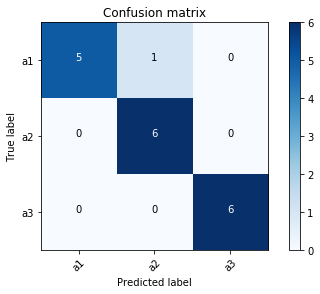

In [26]:
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(accuracy_score(actual_iner, predicted_iner))
print(classification_report(actual_iner, predicted_iner, target_names=test_actions))
cnf_matrix_iner = confusion_matrix(actual_iner, predicted_iner)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_iner, classes=test_actions,
                      title='Confusion matrix')

## Visualization of Action 1

In [53]:
cols = [0, 1, 2, 3, 4, 5, 'cat']

df_plot = pd.DataFrame(columns=cols)
filedir = './Inertial/'

for file in os.listdir(filedir):
    
    if file.endswith(".mat"):
        # import matlab file into df with label
        data = loadmat(filedir + file)
        df_plot1 = pd.DataFrame(data['d_iner'])

        subcat = str(file.split('_')[0] + '_' + file.split('_')[1] + '_' + file.split('_')[2])
        df_plot1['cat'] = subcat

        # append to original df
        df_plot = df_plot.append(df_plot1)

In [82]:
df_plot_a1

,0,1,2,3,4,5,cat
0,-0.959473,-0.177734,-0.192871,5.221374,1.526718,0.152672,a1_s1_t1
1,-0.961914,-0.153320,-0.159912,6.778626,1.954198,0.244275,a1_s1_t1
2,-0.974609,-0.152832,-0.145996,11.267176,3.175573,1.099237,a1_s1_t1
3,-0.941895,-0.135742,-0.127930,16.885496,4.732824,2.320611,a1_s1_t1
4,-0.958252,-0.201416,-0.139404,16.030534,4.000000,0.366412,a1_s1_t1
5,-0.974365,-0.216309,-0.165771,12.763359,3.725191,0.030534,a1_s1_t1
6,-0.929932,-0.136719,-0.075684,10.687023,4.458015,1.251908,a1_s1_t1
7,-0.973145,-0.170410,-0.210938,8.427481,1.557252,1.984733,a1_s1_t1
8,-1.004883,-0.200684,-0.354004,8.549618,4.824427,-2.870229,a1_s1_t1
9,-0.959961,-0.206543,-0.395996,11.572519,11.725191,-5.923664,a1_s1_t1


In [86]:
df_plot_a1 = df_plot[df_plot.cat == 'a1_s1_t1']
df_plot_a1.rename(columns={0: 'acc_X',
                           1: 'acc_Y', 
                           2: 'acc_Z',
                           3: 'gyro_X', 
                           4: 'gyro_Y', 
                           5: 'gyro_Z'}, inplace=True)

/Users/ggu/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


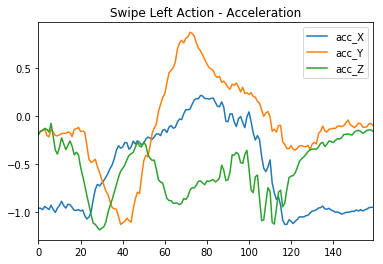

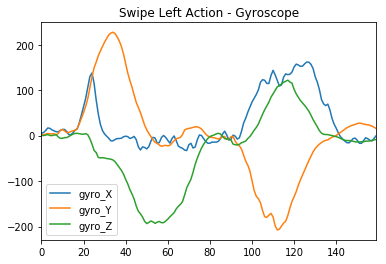

In [87]:
df_plot_a1.loc[:, 'acc_X':'acc_Z'].plot(title='Swipe Left Action - Acceleration')
df_plot_a1.loc[:, 'gyro_X':'gyro_Z'].plot(title='Swipe Left Action - Gyroscope')

plt.show()